<a href="https://colab.research.google.com/github/Julia-Vanyarina/data-science/blob/main/%D0%92%D0%B0%D0%BD%D1%8F%D1%80%D0%B8%D0%BD%D0%B0_%D0%AE%D0%BB%D0%B8%D1%8F_05_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Упражнение: Интерактивная диаграмма в Альтаире

Создайте диаграмму рассеяния с выбранными вами размерами набора данных фильмов, которые вы можете очистить, и сложенную гистограмму, которая фильтруется в соответствии с кистью.

Вот как должна выглядеть ваша составная гистограмма:


![Stacked Histogram](stacked_hist.png)

Ванярина Юлия VanyarinaYA368@mgpu.ru

In [ ]:
!pip3 install altair

In [ ]:
pip install altair_viewer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.5/844.5 kB 11.4 MB/s eta 0:00:00


In [ ]:
!pip3 install vega_datasets

In [ ]:
import altair as alt

In [ ]:
from vega_datasets import data

cars = data.cars()
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


5.1 Реализовать графики в Altair с использованием следующих ключей:

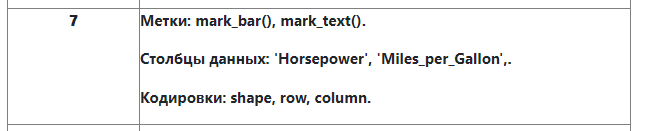

In [ ]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Horsepower', bin=True),
    y=alt.Y('Miles_per_Gallon', bin=True),
    color='mean(Horsepower)',
    shape = 'Origin'
)


alt.Chart(...)

In [ ]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Horsepower', bin=True),
    y=alt.Y('Miles_per_Gallon', bin=True),
    color='mean(Horsepower)',
    row = 'Origin'
)

alt.Chart(...)

In [ ]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Horsepower', bin=True),
    y=alt.Y('Miles_per_Gallon', bin=True),
    color='mean(Horsepower)',
    column = 'Origin'
)

alt.Chart(...)

In [ ]:
alt.Chart(cars).mark_text().encode(
    x='Miles_per_Gallon:O',
    y='Horsepower:Q',
    text='Horsepower',
    shape='Horsepower:O'
).properties(width=1000, height=600)

alt.Chart(...)

In [ ]:
alt.Chart(cars).mark_text().encode(
    x='Miles_per_Gallon:O',
    y='Horsepower:Q',
    text='Horsepower:Q',
    row='Miles_per_Gallon:N'
).properties(width=600, height=400)

alt.Chart(...)

In [ ]:
alt.Chart(cars).mark_text().encode(
    x='Miles_per_Gallon:O',
    y='Horsepower:Q',
    text='Horsepower:Q',
    column='Miles_per_Gallon:N'
).properties(width=600, height=400)

alt.Chart(...)

5.2. Используя данные об автомобилях, создайте диаграмму рассеяния (*scatter-plot*), на которой *размер* (*size*) точек становится больше при наведении на них курсора.

In [ ]:
selector = alt.selection_single(empty='all', on='mouseover')
scatter_plot = alt.Chart(cars).mark_circle().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    size=alt.condition(selector, alt.value(200), alt.value(50)),  # размер меняется при наведении
    color='Origin:N',
    tooltip=['Horsepower', 'Miles_per_Gallon', 'Origin']
).add_selection(
    selector
).properties(
    width=800,
    height=400,
    title='Scatter Plot of Horsepower vs. Miles per Gallon'
)
scatter_plot

alt.Chart(...)

5.3. Используя данные об автомобилях, создайте двухпанельную (*two-panel*) гистограмму (количество миль на галлон на одной панели, количество лошадиных сил на другой), где вы можете перетащить мышь, чтобы выбрать данные на левой панели, чтобы отфильтровать данные на второй панели.

In [ ]:
brush = alt.selection_interval(encodings=['x'])
# Гистограмма для Miles_per_Gallon
mpg_hist = alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon:Q', bin=True),
    y='count()',
    tooltip=['count()']
).add_selection(
    brush
).properties(
    width=400,
    height=300,
    title='Miles per Gallon'
)
# Гистограмма для Horsepower, фильтрованная по выбору в mpg_hist
hp_hist = alt.Chart(cars).mark_bar().encode(
    x=alt.X('Horsepower:Q', bin=True),
    y='count()',
    color=alt.condition(brush, alt.value('steelblue'), alt.value('lightgray')),
    tooltip=['count()']
).transform_filter(
    brush
).properties(
    width=400,
    height=300,
    title='Horsepower'
)
combined_chart = alt.hconcat(mpg_hist, hp_hist).resolve_legend(
    color="independent"
)
combined_chart

alt.HConcatChart(...)

5.4. Измените приведенный выше пример диаграммы разброса и гистограммы, чтобы

- панорамировать и увеличивать диаграмму рассеяния;
- гистограмма отражала только те точки, которые видны в данный момент.

In [ ]:

brush = alt.selection_interval()

# Диаграмма рассеяния с панорамированием и увеличением
scatter_plot = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
    tooltip=['Name', 'Horsepower', 'Miles_per_Gallon']
).add_selection(
    brush
).properties(
    width=600,
    height=400,
    title='Scatter Plot of Horsepower vs. Miles per Gallon'
).interactive()

# Гистограмма для Horsepower, фильтрованная по выбору в scatter_plot
hp_hist = alt.Chart(cars).mark_bar().encode(
    x=alt.X('Horsepower:Q', bin=True),
    y='count()',
    tooltip=['count()']
).transform_filter(
    brush
).properties(
    width=600,
    height=200,
    title='Histogram of Horsepower'
)
combined_chart = alt.vconcat(
    scatter_plot,
    hp_hist
).resolve_legend(
    color="independent"
)
combined_chart

alt.VConcatChart(...)

5.5. Создайте диаграмму на основе самостоятельно сгенерированных данных и постройте кривые синуса и косинуса с помощью `transform_calculate`.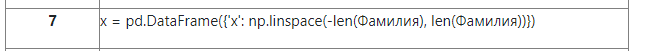

In [ ]:
import pandas as pd
import numpy as np
# Определение длины фамилии
surname = "Ванярина"
length_of_surname = len(surname)
x = pd.DataFrame({'x': np.linspace(-length_of_surname, length_of_surname, 1783)})
# Создание диаграммы
chart = alt.Chart(x).transform_calculate(
    sin='sin(datum.x)',
    cos='cos(datum.x)'
).mark_line().encode(
    x='x:Q',
    y='sin:Q',
    color=alt.value('blue')
).properties(
    title='Синус и Косинус'
) + alt.Chart(x).transform_calculate(
    sin='sin(datum.x)',
    cos='cos(datum.x)'
).mark_line().encode(
    x='x:Q',
    y='cos:Q',
    color=alt.value('red')
)
chart

alt.LayerChart(...)

5.6. Используйте `transform_filter` на диаграмме задания 4 и удалите области графика, где значение кривой косинуса меньше значения кривой синуса.

In [ ]:
surname = "Ванярина"
length_of_surname = len(surname)
x = pd.DataFrame({'x': np.linspace(-length_of_surname, length_of_surname, 941)})
base = alt.Chart(x).transform_calculate(
    sin='sin(datum.x)',
    cos='cos(datum.x)'
)
filtered = base.transform_filter(
    'datum.cos >= datum.sin'
)
# Диаграмма для синуса
sin_chart = filtered.mark_line(color='blue').encode(
    x='x:Q',
    y='sin:Q'
)
# Диаграмма для косинуса
cos_chart = filtered.mark_line(color='red').encode(
    x='x:Q',
    y='cos:Q'
)
chart = sin_chart + cos_chart
chart.properties(
    title='Фильтрованные кривые синуса и косинуса'
)

alt.LayerChart(...)

5.7. Используйте любимую визуализацию из предыдущего упражнения и настройте эстетику графика:


- настроить вид меток (`size`, `strokewidth` и т. д.).

- изменить оси и названия графика.

- изменить пределы `x` и `y`.

In [ ]:
surname = "Ванярина"
length_of_surname = len(surname)

# Генерация данных
x = pd.DataFrame({'x': np.linspace(-length_of_surname, length_of_surname, 785)})
base = alt.Chart(x).transform_calculate(
    sin='sin(datum.x)',
    cos='cos(datum.x)'
)
filtered = base.transform_filter(
    'datum.cos >= datum.sin'
)
sin_chart = filtered.mark_line(color='blue', strokeDash=[10,5]).encode(
    x=alt.X('x:Q', axis=alt.Axis(title='X', labelFontSize=12)),
    y=alt.Y('sin:Q', axis=alt.Axis(title='Sin(x)', labelFontSize=12)),
    strokeWidth=alt.value(2)
)
cos_chart = filtered.mark_line(color='orange').encode(
    x=alt.X('x:Q', axis=alt.Axis(title='X', labelFontSize=12)),
    y=alt.Y('cos:Q', axis=alt.Axis(title='Cos(x)', labelFontSize=12)),
    strokeWidth=alt.value(2)
)
chart = alt.layer(sin_chart, cos_chart).resolve_scale(y='independent')
chart = chart.properties(
    title='Синус и Косинус',
    width=500,
    height=300
).configure_axis(
    grid=False
).configure_legend(
    title=None,
    labelFontSize=12
).configure_view(
    fill='lavender'
)
chart


alt.LayerChart(...)